# Homework 4 - CMSE 401
## Annie Wilcox

In [29]:
import matplotlib.pyplot as plt

## Part 1: Serial Benchmarking:

I compiled the serial code on developer node `amd-24-h200` using the following commands:

``` batch
make
sbatch timecheck.sh
```

The `timecheck.sh` script ran the job 10 times with differing input seeds each time. 
* **Average Runtime:** ~ 957.2 seconds or 16 minutes per run, or roughly 2.5 hours total
* **Best Fit:** Seed 7: 274

## Part 2: Pleasantly Parallel Benchmarking:

I used `job_array.sb` to run the program on 50 CPUs and `extraction.sh` to find the best fitness of all the iterations using the following commands:
``` bash
make
sbatch job_array.sb
sbatch extraction.sh
```

* **Average Runtime:** ~ 936.32 seconds or 15.6 minutes
* **Best Fit:** Seed 38: 254

## Part 3: Consolidating Results:

I used the following command to run the MPI consolidating program on 50 CPUs:
``` batch
sbatch mpi_job.sb
```

* **Runtime:** 24 seconds
* **Best Fit:** Seed 6: 286

## Part 4: MPI Intermittent State Sharing:

After making the changes as specified, I ran the same command as above.

* **Runtime:** 23 Seconds
* **Best Fit:** 287

## Part 5: Final Writeup:

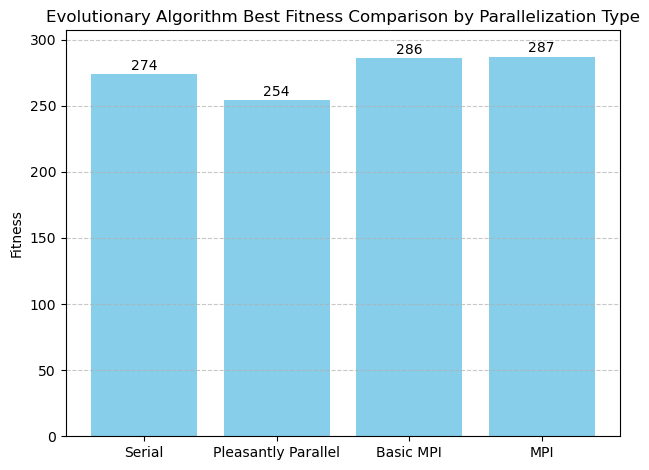

In [36]:
best_fit = {
    "Serial" : [274],
    "Pleasantly Parallel" : [254],
    "Basic MPI": [286],
    "MPI" : [287],
}

time = (957.2, 936.32, 24, 23)

labels = list(best_fit.keys())
values = [v[0] for v in best_fit.values()]

bars = plt.bar(labels, values, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', va='bottom')

plt.title("Evolutionary Algorithm Best Fitness Comparison by Parallelization Type")
plt.ylabel("Fitness")
plt.ylim(0, max(values) + 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The parallelized version of the code that uses the `job_array.sb` submission script is by far the "winner". I was very surprised to see that using MPI actually decreased the best fitness in both instances. I think MPI may falter with evolutionary algorithms because each rank only works with a small portion of the population. If we applied this practice in real life, it would reduce evolutionary pressure, as each portion of the population would have less competiton (survival of the fittest). The pleasantly parallel verison of this code runs the program on 50 different CPUs. Each CPU runs the entire algorithm - thus having access to the entire population, and leading to better diversity of outcomes. It is also possible that my MPI code might've run better with more synchronization, or that the round-robin nature of the MPI code lead to overhead as various ranks waited to send and receive messages. Overall, it is important as a developer to remember that we often times face the choice between perfect accuracy/quality of a program, and the time and resources spent running it. MPI is less effective at finding fitness in an evolution algorithm, but it does it in a fraction of the time that it takes the pleasantly parallel version to run (39x faster). 